In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter
import seaborn as sns

In [3]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../logs/analysis/Al00.csv')
df_BA = pd.read_csv('../logs/analysis/BA00.csv')
df_CHP = pd.read_csv('../logs/analysis/CH00.csv')
df_DE = pd.read_csv('../logs/analysis/DE01.csv')
df_solarPV_10min = pd.read_csv('../data/solarPV_10min.csv')
df.head()
#df.shape

,balancing,balancing.1,balancing.2,battery,battery.1,battery.2,battery.3,battery.4,grid,grid.1,...,balance,balance.1,balance.2,balance.3,balance.4,balance.5,balance.6,balance.7,balance.8,balance.9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,loss_load,overgeneration,reward,charge_amount,current_charge,discharge_amount,reward,soc,co2_per_kwh_current,co2_production,...,reward,shaped_reward,overall_provided_to_microgrid,overall_absorbed_from_microgrid,flex_provided_to_microgrid,flex_absorbed_from_microgrid,controllable_provided_to_microgrid,controllable_absorbed_from_microgrid,fixed_provided_to_microgrid,fixed_absorbed_from_microgrid
2,0.0,0.0,-0.0,0.0,11648.35,718.0,-0.0,0.5,999.0,-0.0,...,0.0,0.0,718.0,718.0,0.0,0.0,718.0,0.0,0.0,718
3,0.0,0.0,-0.0,0.0,10850.572222222223,718.0,-0.0,0.4657557603532785,999.0,-0.0,...,0.0,0.0,718.0,718.0,0.0,0.0,718.0,0.0,0.0,718
4,0.0,0.0,-0.0,0.0,10052.794444444446,718.0,-0.0,0.43151152070655696,999.0,-0.0,...,0.0,0.0,718.0,718.0,0.0,0.0,718.0,0.0,0.0,718


In [4]:
df_PT = pd.read_csv('../logs/analysis/PT02.csv')
df_ES = pd.read_csv('../logs/analysis/ES12.csv')
df_FR = pd.read_csv('../logs/analysis/FR15.csv')
df_SI = pd.read_csv('../logs/analysis/SI00.csv')
df_BG = pd.read_csv('../logs/analysis/BG01.csv')
df_TR = pd.read_csv('../logs/analysis/TR03.csv')
df_TR2 = pd.read_csv('../logs/analysis/TR13.csv')

df_PT_battery = df_PT[['battery', 'battery.1', 'battery.2', 'battery.3', 'battery.4']]
df_ES_battery = df_ES[['battery', 'battery.1', 'battery.2', 'battery.3', 'battery.4']]
df_FR_battery = df_FR[['battery', 'battery.1', 'battery.2', 'battery.3', 'battery.4']]
df_SI_battery = df_SI[['battery', 'battery.1', 'battery.2', 'battery.3', 'battery.4']]
df_BG_battery = df_BG[['battery', 'battery.1', 'battery.2', 'battery.3', 'battery.4']]
df_TR_battery = df_TR[['battery', 'battery.1', 'battery.2', 'battery.3', 'battery.4']]
df_TR2_battery = df_TR2[['battery', 'battery.1', 'battery.2', 'battery.3', 'battery.4']]

df_PT_battery_plot = df_PT_battery.drop([0,1])
df_ES_battery_plot = df_ES_battery.drop([0,1])
df_FR_battery_plot = df_FR_battery.drop([0,1])
df_SI_battery_plot = df_SI_battery.drop([0,1])
df_BG_battery_plot = df_BG_battery.drop([0,1])
df_TR_battery_plot = df_TR_battery.drop([0,1])
df_TR2_battery_plot = df_TR2_battery.drop([0,1])

df_PT_battery_plot["battery.4"] = df_PT_battery_plot["battery.4"].astype(float)
df_ES_battery_plot["battery.4"] = df_ES_battery_plot["battery.4"].astype(float)
df_FR_battery_plot["battery.4"] = df_FR_battery_plot["battery.4"].astype(float)
df_SI_battery_plot["battery.4"] = df_SI_battery_plot["battery.4"].astype(float)
df_BG_battery_plot["battery.4"] = df_BG_battery_plot["battery.4"].astype(float)
df_TR_battery_plot["battery.4"] = df_TR_battery_plot["battery.4"].astype(float)
df_TR2_battery_plot["battery.4"] = df_TR2_battery_plot["battery.4"].astype(float)


In [5]:
df.columns

Index(['balancing', 'balancing.1', 'balancing.2', 'battery', 'battery.1',
       'battery.2', 'battery.3', 'battery.4', 'grid', 'grid.1', 'grid.2',
       'grid.3', 'grid.4', 'grid.5', 'grid.6', 'grid.7', 'node', 'node.1',
       'node.2', 'node.3', 'node.4', 'node.5', 'node.6', 'node.7', 'node.8',
       'node.9', 'node.10', 'node.11', 'node.12', 'node.13', 'node.14',
       'node.15', 'node.16', 'node.17', 'pv_source', 'pv_source.1',
       'pv_source.2', 'pv_source.3', 'balance', 'balance.1', 'balance.2',
       'balance.3', 'balance.4', 'balance.5', 'balance.6', 'balance.7',
       'balance.8', 'balance.9'],
      dtype='object')

In [6]:
df_battery = df[['battery', 'battery.1', 'battery.2', 'battery.3', 'battery.4']]
df_battery_BA = df_BA[['battery', 'battery.1', 'battery.2', 'battery.3', 'battery.4']]
df_battery_CHP = df_CHP[['battery', 'battery.1', 'battery.2', 'battery.3', 'battery.4']]
df_battery_DE = df_DE[['battery', 'battery.1', 'battery.2', 'battery.3', 'battery.4']]

df_battery.drop([0])
df_battery_BA.drop([0])
df_battery_CHP.drop([0])
df_battery_DE.drop([0])

#df_battery.head()
df_battery_plot = df_battery.drop([0,1])
df_battery_BA_plot = df_battery_BA.drop([0,1])
df_battery_CHP_plot = df_battery_CHP.drop([0,1])
df_battery_DE_plot = df_battery_DE.drop([0,1])

df_battery_plot["battery.4"] = df_battery_plot["battery.4"].astype(float)
df_battery_plot["battery.3"] = df_battery_plot["battery.3"].astype(float)
df_battery_plot["battery.2"] = df_battery_plot["battery.2"].astype(float)
df_battery_plot["battery.1"] = df_battery_plot["battery.1"].astype(float)
df_battery_plot["battery"] = df_battery_plot["battery"].astype(float)

df_battery_BA_plot["battery.4"] = df_battery_BA_plot["battery.4"].astype(float)
df_battery_BA_plot["battery.3"] = df_battery_BA_plot["battery.3"].astype(float)
df_battery_BA_plot["battery.2"] = df_battery_BA_plot["battery.2"].astype(float)
df_battery_BA_plot["battery.1"] = df_battery_BA_plot["battery.1"].astype(float)
df_battery_BA_plot["battery"] = df_battery_BA_plot["battery"].astype(float)

df_battery_CHP_plot["battery.4"] = df_battery_CHP_plot["battery.4"].astype(float)
df_battery_CHP_plot["battery.3"] = df_battery_CHP_plot["battery.3"].astype(float)
df_battery_CHP_plot["battery.2"] = df_battery_CHP_plot["battery.2"].astype(float)
df_battery_CHP_plot["battery.1"] = df_battery_CHP_plot["battery.1"].astype(float)
df_battery_CHP_plot["battery"] = df_battery_CHP_plot["battery"].astype(float)

df_battery_DE_plot["battery.4"] = df_battery_DE_plot["battery.4"].astype(float)
df_battery_DE_plot["battery.3"] = df_battery_DE_plot["battery.3"].astype(float)
df_battery_DE_plot["battery.2"] = df_battery_DE_plot["battery.2"].astype(float)
df_battery_DE_plot["battery.1"] = df_battery_DE_plot["battery.1"].astype(float)
df_battery_DE_plot["battery"] = df_battery_DE_plot["battery"].astype(float)

df_battery_plot.dtypes


battery      float64
battery.1    float64
battery.2    float64
battery.3    float64
battery.4    float64
dtype: object

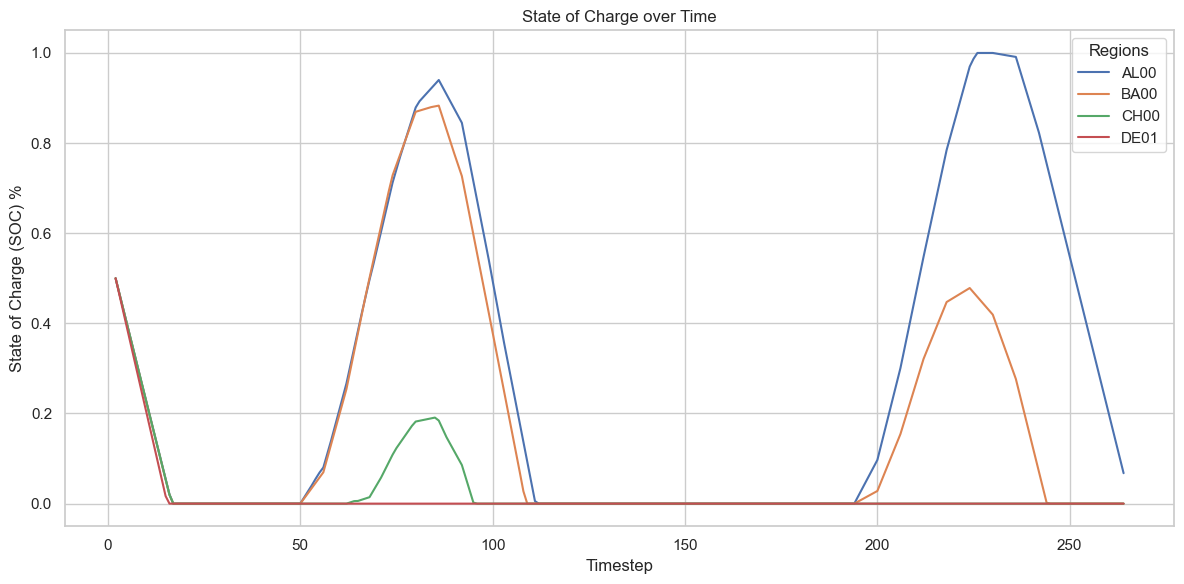

In [7]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_battery_plot.index, y=df_battery_plot['battery.4'], label='AL00')
sns.lineplot(x=df_battery_BA_plot.index, y=df_battery_BA_plot['battery.4'], label='BA00')
sns.lineplot(x=df_battery_CHP_plot.index, y=df_battery_CHP_plot['battery.4'], label='CH00')
sns.lineplot(x=df_battery_DE_plot.index, y=df_battery_DE_plot['battery.4'], label='DE01')


plt.xlabel("Timestep")
plt.ylabel("State of Charge (SOC) %")
plt.title("State of Charge over Time")
plt.legend(title="Regions")
# Set y-axis limit but let ticks be automatically chosen (with fewer and clean values)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6))  # Max 6 ticks, evenly spaced
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))  # Format like 0.0, 0.2, ...

plt.tight_layout()
plt.show()

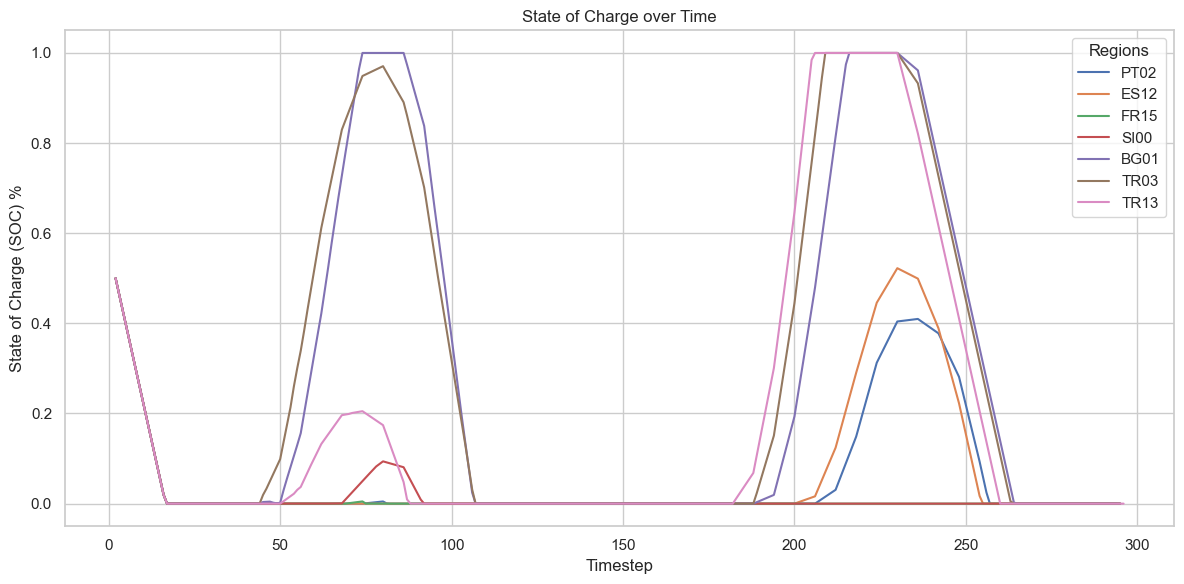

In [8]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_PT_battery_plot.index, y=df_PT_battery_plot['battery.4'], label='PT02')
sns.lineplot(x=df_ES_battery_plot.index, y=df_ES_battery_plot['battery.4'], label='ES12')
sns.lineplot(x=df_FR_battery_plot.index, y=df_FR_battery_plot['battery.4'], label='FR15')
sns.lineplot(x=df_SI_battery_plot.index, y=df_SI_battery_plot['battery.4'], label='SI00')
sns.lineplot(x=df_BG_battery_plot.index, y=df_BG_battery_plot['battery.4'], label='BG01')
sns.lineplot(x=df_TR_battery_plot.index, y=df_TR_battery_plot['battery.4'], label='TR03')
sns.lineplot(x=df_TR2_battery_plot.index, y=df_TR2_battery_plot['battery.4'], label='TR13')


plt.xlabel("Timestep")
plt.ylabel("State of Charge (SOC) %")
plt.title("State of Charge over Time")
plt.legend(title="Regions")
# Set y-axis limit but let ticks be automatically chosen (with fewer and clean values)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6))  # Max 6 ticks, evenly spaced
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))  # Format like 0.0, 0.2, ...

plt.tight_layout()
plt.show()

In [9]:
df_PT_grid = df_PT[['grid', 'grid.1', 'grid.2', 'grid.3', 'grid.4', 'grid.5', 'grid.6', 'grid.7']]
df_PT_pv = df_PT[['pv_source', 'pv_source.1', 'pv_source.2', 'pv_source.3']]

df_PT_grid = df_PT_grid.drop([0,1])
df_PT_pv = df_PT_pv.drop([0,1])
df_PT_grid["grid.3"] = df_PT_grid["grid.3"].astype(float)
df_PT_grid["grid.4"] = df_PT_grid["grid.4"].astype(float)

df_PT_pv["pv_source.1"] = df_PT_pv["pv_source.1"].astype(float)

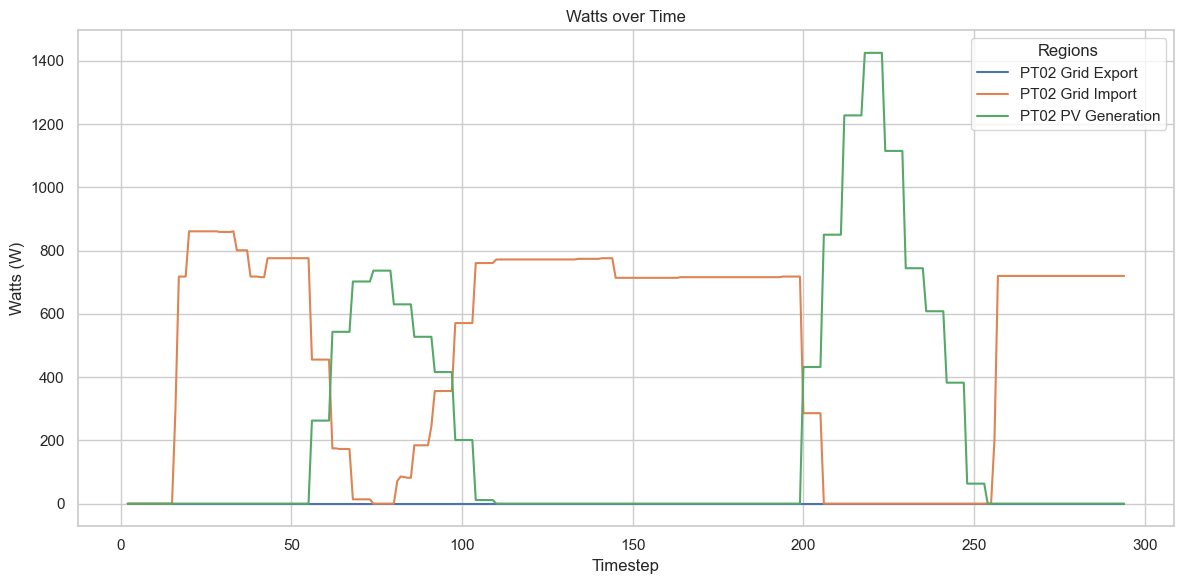

In [10]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_PT_grid.index, y=df_PT_grid['grid.3'], label='PT02 Grid Export')
sns.lineplot(x=df_PT_grid.index, y=df_PT_grid['grid.4'], label='PT02 Grid Import')
sns.lineplot(x=df_PT_pv.index, y=df_PT_pv['pv_source.1'] * 3600, label='PT02 PV Generation')



plt.xlabel("Timestep")
plt.ylabel("Watts (W)")
plt.title("Watts over Time")
plt.legend(title="Regions")
# Set y-axis limit but let ticks be automatically chosen (with fewer and clean values)
#plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6))  # Max 6 ticks, evenly spaced
#plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))  # Format like 0.0, 0.2, ...

plt.tight_layout()
plt.show()

In [11]:
#df_node = df[['node', 'node.1', 'node.2', 'node.3', 'node.4', 'node.5', 'node.6', 'node.7', 'node.8', 'node.9', 'node.10', 'node.11', 'node.12', 'node.13', 'node.14', 'node.15', 'node.16', 'node.17']]
df_node = df[['node', 'node.1', 'node.2']]
df_node.drop([0])
#df_node.tail(1)

,node,node.1,node.2
1,load_met,node_current,reward
2,120,-41.7881511358717,0.0
3,120,-17.168360097022767,0.0
4,120,-13.611087213852187,0.0
5,120,-33.078886144973474,0.0
...,...,...,...
260,120,-1.5145414679786207,0.0
261,120,-16.014348887468085,0.0
262,120,-30.12426601960457,0.0
263,120,-4.046918107803103,0.0


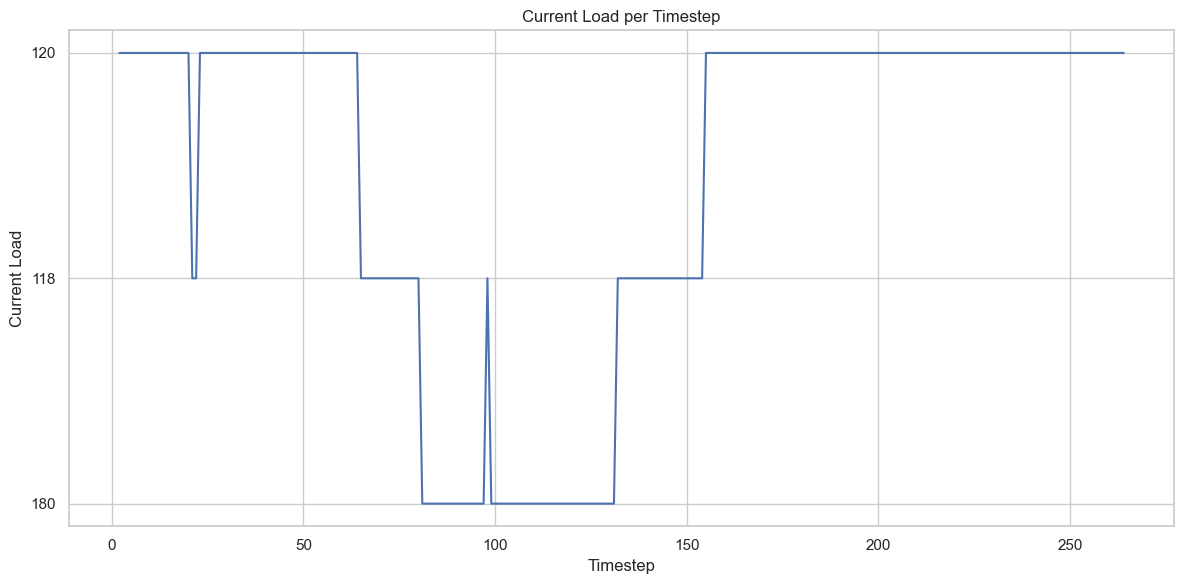

In [12]:
df_node_plot = df_node.iloc[2:]

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_node_plot.index, y=df_node_plot['node'])

plt.xlabel("Timestep")
plt.ylabel("Current Load")
plt.title("Current Load per Timestep")
plt.tight_layout()
plt.show()

In [13]:
df_grid = df[['grid', 'grid.1', 'grid.2', 'grid.3', 'grid.4', 'grid.5', 'grid.6', 'grid.7']]
df_grid.drop([0])

,grid,grid.1,grid.2,grid.3,grid.4,grid.5,grid.6,grid.7
1,co2_per_kwh_current,co2_production,export_price_current,grid_export,grid_import,grid_status_current,import_price_current,reward
2,999.0,-0.0,0.0008757038586030666,0.0,-0.0,1.0,0.0009730042873367406,0.0
3,999.0,-0.0,0.0008757038586030666,0.0,-0.0,1.0,0.0009730042873367406,0.0
4,999.0,-0.0,0.0008757038586030666,0.0,-0.0,1.0,0.0009730042873367406,0.0
5,999.0,-0.0,0.0008757038586030666,0.0,-0.0,1.0,0.0009730042873367406,0.0
...,...,...,...,...,...,...,...,...
260,999.0,-0.0,0.0008757038586030666,0.0,-0.0,1.0,0.0009730042873367406,0.0
261,999.0,-0.0,0.0008757038586030666,0.0,-0.0,1.0,0.0009730042873367406,0.0
262,999.0,-0.0,0.0008757038586030666,0.0,-0.0,1.0,0.0009730042873367406,0.0
263,999.0,-0.0,0.0008757038586030666,0.0,-0.0,1.0,0.0009730042873367406,0.0


In [14]:
df_pv_source = df[['pv_source', 'pv_source.1', 'pv_source.2', 'pv_source.3']]
df_pv_source.drop([0])

,pv_source,pv_source.1,pv_source.2,pv_source.3
1,curtailment,renewable_current,renewable_used,reward
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
...,...,...,...,...
260,0.0,0.0,0.0,0.0
261,0.0,0.0,0.0,0.0
262,0.0,0.0,0.0,0.0
263,0.0,0.0,0.0,0.0


In [15]:
df_balancing = df[['balancing', 'balancing.1', 'balancing.2']]
df_balancing.drop([0])

,balancing,balancing.1,balancing.2
1,loss_load,overgeneration,reward
2,0.0,0.0,-0.0
3,0.0,0.0,-0.0
4,0.0,0.0,-0.0
5,0.0,0.0,-0.0
...,...,...,...
260,0.0,0.0,-0.0
261,0.0,0.0,-0.0
262,0.0,0.0,-0.0
263,0.0,0.0,-0.0


In [ ]:

df_balance = df[['balance', 'balance.1', 'balance.2', 'balance.3', 'balance.4', 'balance.5', 'balance.6', 'balance.7', 'balance.8', 'balance.9']]
df_balance.drop([0])

,balance,balance.1,balance.2,balance.3,balance.4,balance.5,balance.6,balance.7,balance.8,balance.9
1,reward,shaped_reward,overall_provided_to_microgrid,overall_absorbed_from_microgrid,flex_provided_to_microgrid,flex_absorbed_from_microgrid,controllable_provided_to_microgrid,controllable_absorbed_from_microgrid,fixed_provided_to_microgrid,fixed_absorbed_from_microgrid
2,0.0,0.0,718.0,718.0,0.0,0.0,718.0,0.0,0.0,718
3,0.0,0.0,718.0,718.0,0.0,0.0,718.0,0.0,0.0,718
4,0.0,0.0,718.0,718.0,0.0,0.0,718.0,0.0,0.0,718
5,0.0,0.0,718.0,718.0,0.0,0.0,718.0,0.0,0.0,718
...,...,...,...,...,...,...,...,...,...,...
260,0.0,0.0,720.0,720.0,0.0,0.0,720.0,0.0,0.0,720
261,0.0,0.0,720.0,720.0,0.0,0.0,720.0,0.0,0.0,720
262,0.0,0.0,720.0,720.0,0.0,0.0,720.0,0.0,0.0,720
263,0.0,0.0,720.0,720.0,0.0,0.0,720.0,0.0,0.0,720


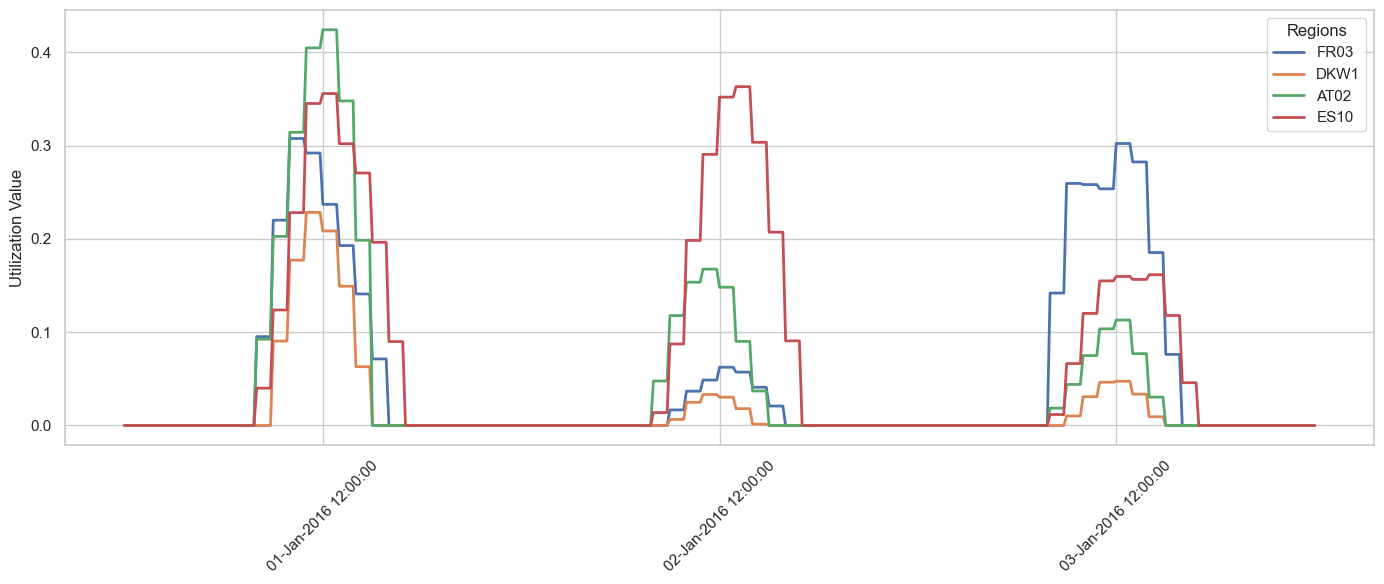

In [17]:
# Convert Time column to datetime
df_solarPV_10min["Time"] = pd.to_datetime(df_solarPV_10min["Time"], format="%d-%b-%Y %H:%M:%S")

# Select 1008 rows (7 days at 10-minute intervals)
selected_df = df_solarPV_10min.loc[:432, ["Time", "FR03", "DKW1", "AT02", "ES10"]]

# Melt for seaborn
long_df = selected_df.melt(id_vars="Time", var_name="Series", value_name="Value")

# Define line styles and grayscale palette
styles = ['solid', 'dashed', 'dotted', 'dashdot']
widths = [2.5, 1.5, 2.5, 1.5]
#colors = sns.color_palette("gray", n_colors=4)
colors = sns.color_palette("deep", n_colors=4)

# Plot
plt.figure(figsize=(14, 6))
#plt.figure(figsize=(28, 12))
for i, series in enumerate(["FR03", "DKW1", "AT02", "ES10"]):
    subset = long_df[long_df["Series"] == series]
    plt.plot(
        subset["Time"],
        subset["Value"],
        label=series,
        #linestyle=styles[i],
        linestyle="solid",
        #linewidth=widths[i],
        linewidth=2,
        color=colors[i]
    )

# Find tick positions at 12:00:00 each day
tick_times = selected_df[selected_df["Time"].dt.time == pd.to_datetime("12:00:00").time()]["Time"]

# Set full-format x-axis labels
plt.xticks(
    ticks=tick_times,
    labels=tick_times.dt.strftime("%d-%b-%Y %H:%M:%S"),
    rotation=45
)

#plt.xlabel("Time")
plt.ylabel("Utilization Value")
#plt.title("7-Day Line Plot with Daily Labels at 12:00:00")
plt.legend(title="Regions")
plt.tight_layout()
plt.show()

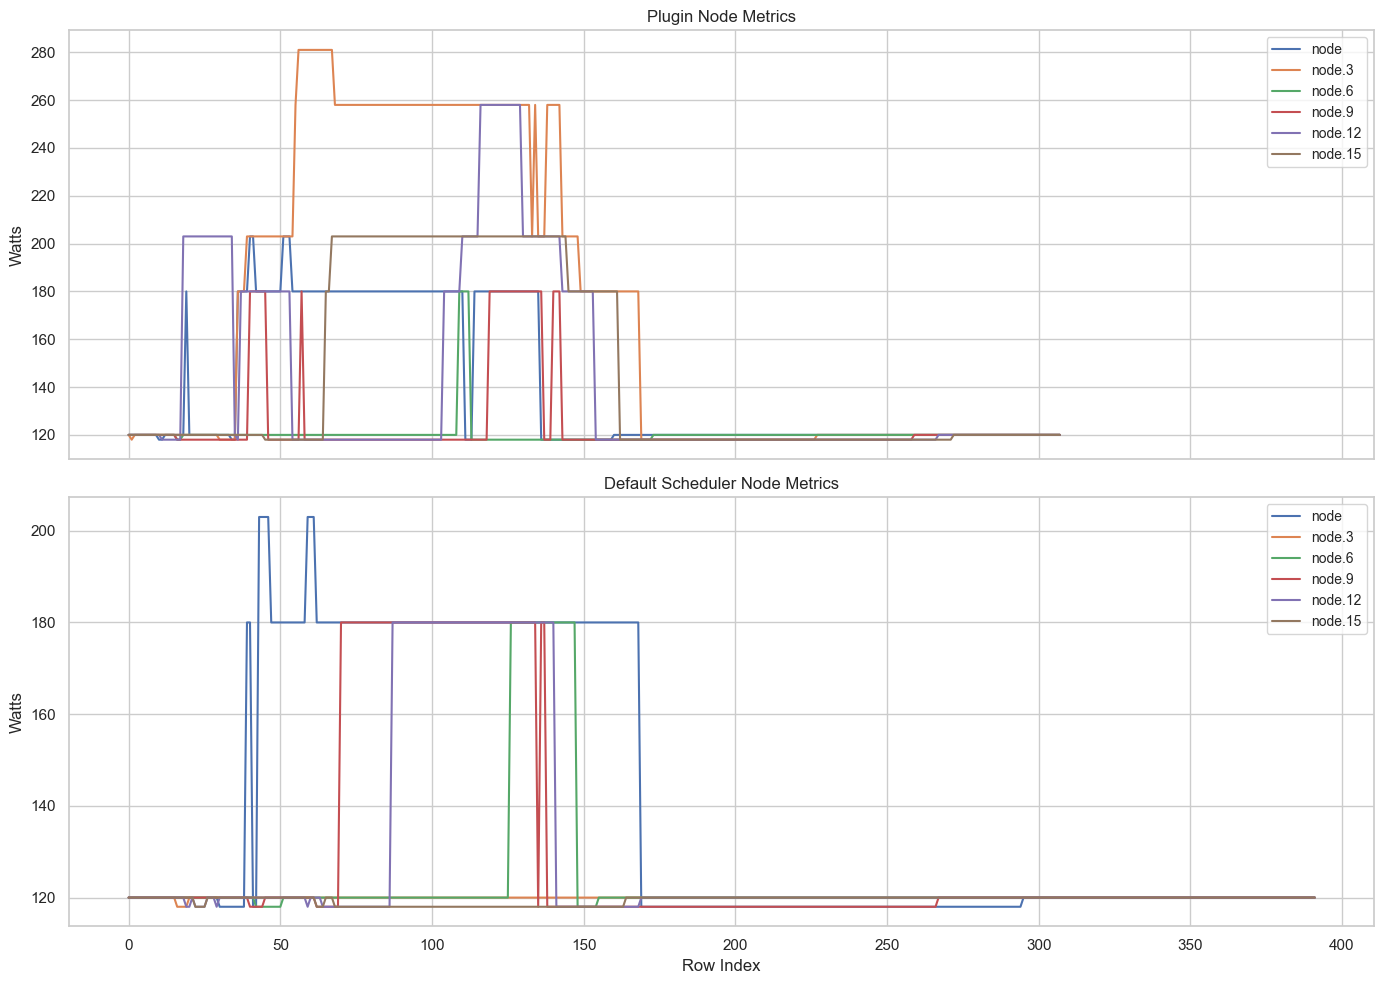

In [51]:
plugin = pd.read_csv('../logs/results/Al00plugin.csv')
default = pd.read_csv('../logs/results/Al00default.csv')
plugin_node = plugin[['node', 'node.3', 'node.6', 'node.9', 'node.12', 'node.15']]
default_node = default[['node', 'node.3', 'node.6', 'node.9', 'node.12', 'node.15']]

plugin_node_drop = plugin_node.drop([0,1])
default_node_drop = default_node.drop([0,1])
plugin_node_drop = plugin_node_drop.reset_index(drop=True)
default_node_drop = default_node_drop.reset_index(drop=True)


plugin_node_drop["node"] = plugin_node_drop["node"].astype(float)
plugin_node_drop["node.3"] = plugin_node_drop["node.3"].astype(float)
plugin_node_drop["node.6"] = plugin_node_drop["node.6"].astype(float)
plugin_node_drop["node.9"] = plugin_node_drop["node.9"].astype(float)
plugin_node_drop["node.12"] = plugin_node_drop["node.12"].astype(float)
plugin_node_drop["node.15"] = plugin_node_drop["node.15"].astype(float)

default_node_drop["node"] = default_node_drop["node"].astype(float)
default_node_drop["node.3"] = default_node_drop["node.3"].astype(float)
default_node_drop["node.6"] = default_node_drop["node.6"].astype(float)
default_node_drop["node.9"] = default_node_drop["node.9"].astype(float)
default_node_drop["node.12"] = default_node_drop["node.12"].astype(float)
default_node_drop["node.15"] = default_node_drop["node.15"].astype(float)


# Create the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot plugin node values
plugin_node_drop.plot(ax=axes[0])
axes[0].set_title("Plugin Node Metrics")
axes[0].set_ylabel("Watts")
axes[0].grid(True)
axes[0].legend(loc='upper right', fontsize='small')

# Plot default node values
default_node_drop.plot(ax=axes[1])
axes[1].set_title("Default Scheduler Node Metrics")
axes[1].set_xlabel("Row Index")
axes[1].set_ylabel("Watts")
axes[1].grid(True)
axes[1].legend(loc='upper right', fontsize='small')

# Improve layout
plt.tight_layout()
plt.show()

